### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd
# import data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# set plot figure size to 15 x 12
plt.rcParams["figure.figsize"] = (15, 12)

In [2]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2

In [3]:
# pandas version
pd.__version__

'1.3.1'

In [4]:
# import data
# url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/College.csv"
file_name = '../../Data/College.csv'
College = pd.read_csv(file_name, index_col = 'Unnamed: 0')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
# verify duplicate values
College.duplicated().sum()


0

In [7]:
# verify missing values
College.isnull().sum().sum()

0

In [8]:
# plt.xkcd()
# plt.figure(figsize = (25, 10))
# sns.heatmap(College.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
# descriptive statistics
College.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


array([[<AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>,
        <AxesSubplot:title={'center':'Top10perc'}>],
       [<AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>],
       [<AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>],
       [<AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>,
        <AxesSubplot:title={'center':'Expend'}>],
       [<AxesSubplot:title={'center':'Grad.Rate'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

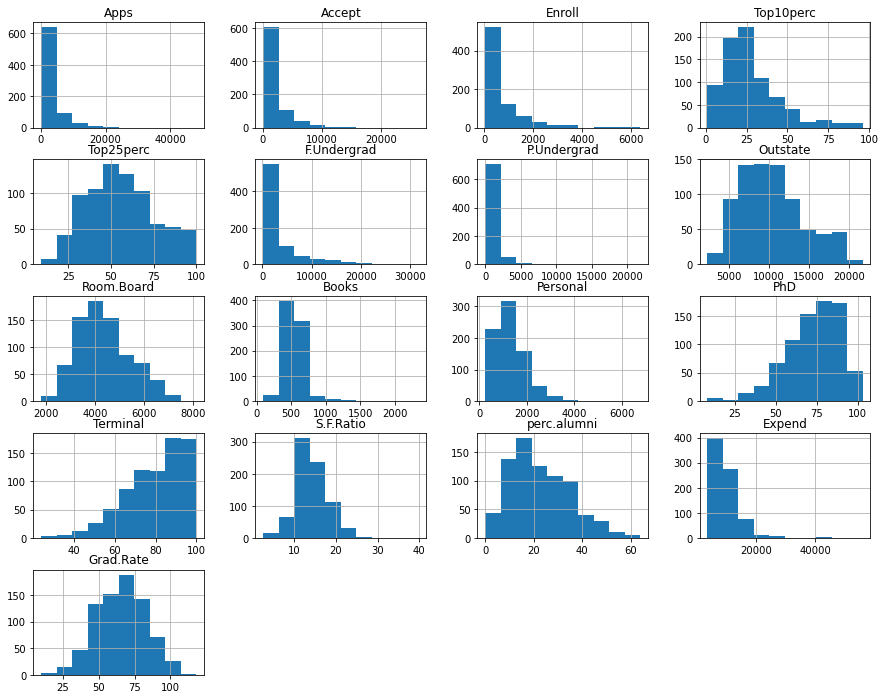

In [10]:
# histograms
College.hist()

<AxesSubplot:>

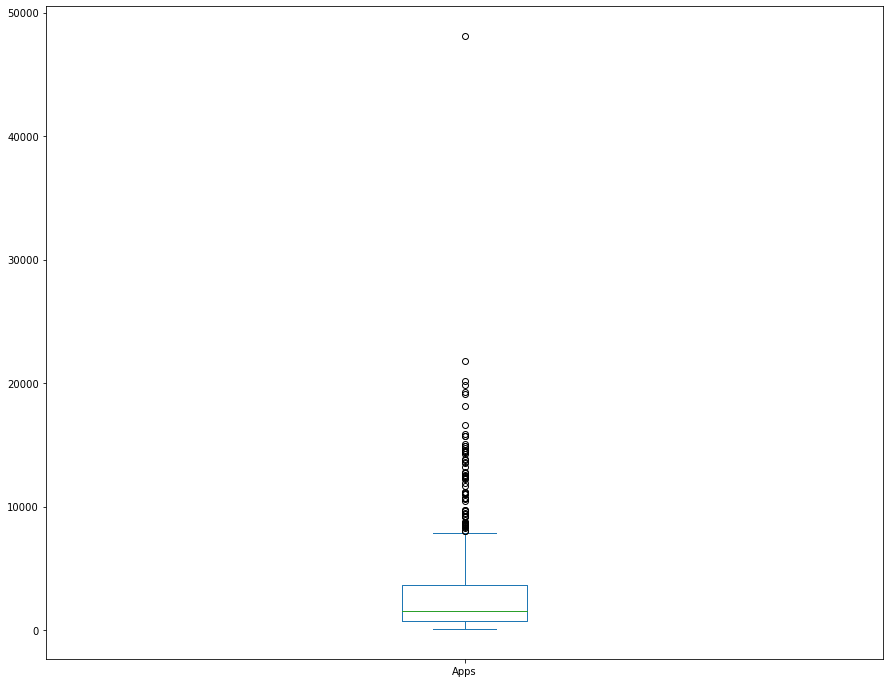

In [11]:
# 'Apps' boxplot
College['Apps'].plot(kind='box')

**Lots of outliers in `Apps`!**

<AxesSubplot:>

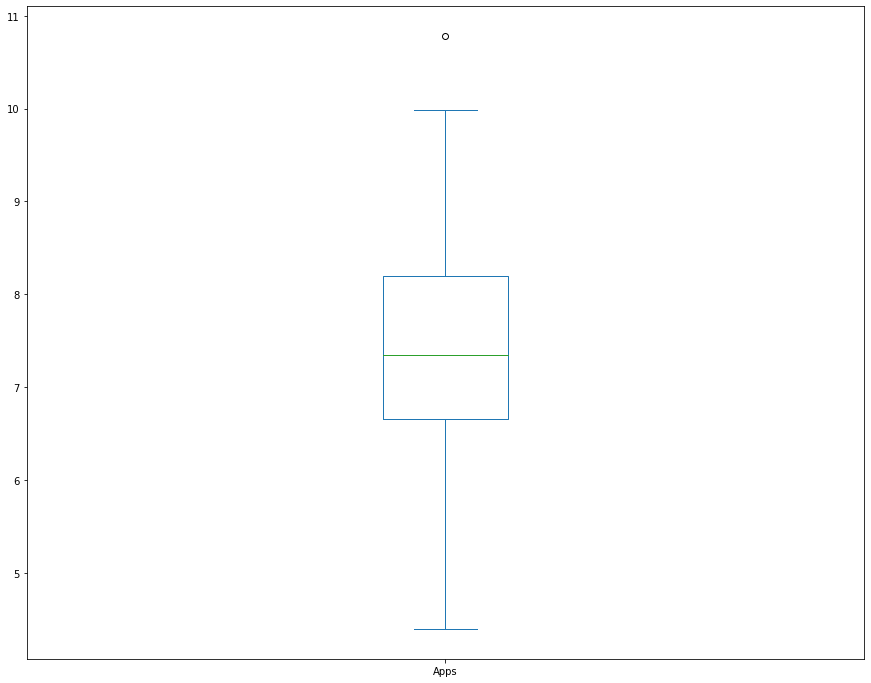

In [12]:
# boxplot log transform 'Apps'
np.log(College['Apps']).plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

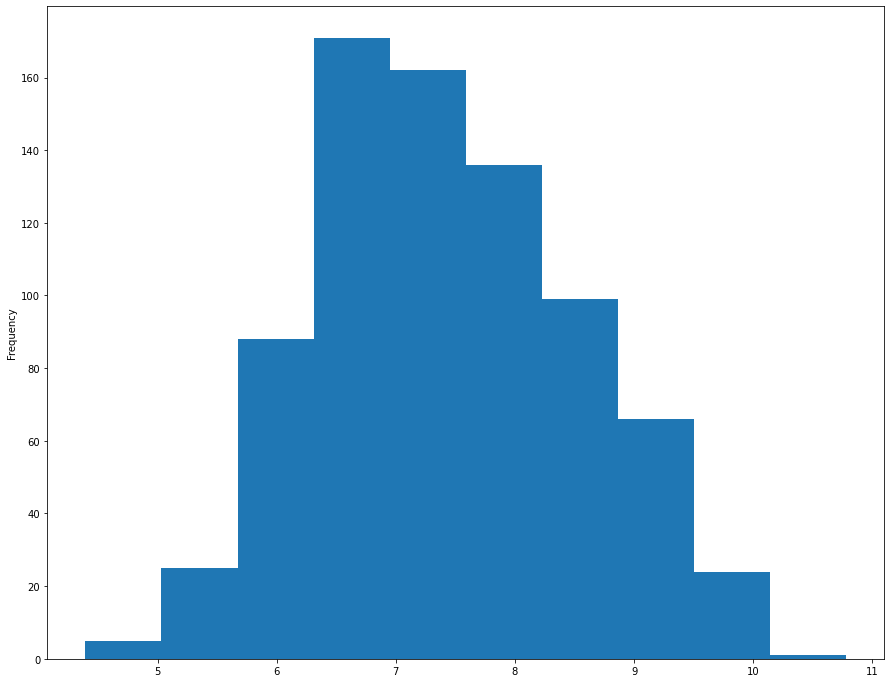

In [13]:
# histogram log transform 'Apps'
np.log(College['Apps']).plot(kind = 'hist')

In [14]:
# create `log_Apps`
# College['log_Apps'] = np.log(College['Apps'])

In [15]:
# count 'Private'
College['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [16]:
# convert "Private" to binary
College['Private'] = (College['Private'] =='Yes').astype(int) 

In [17]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<AxesSubplot:>

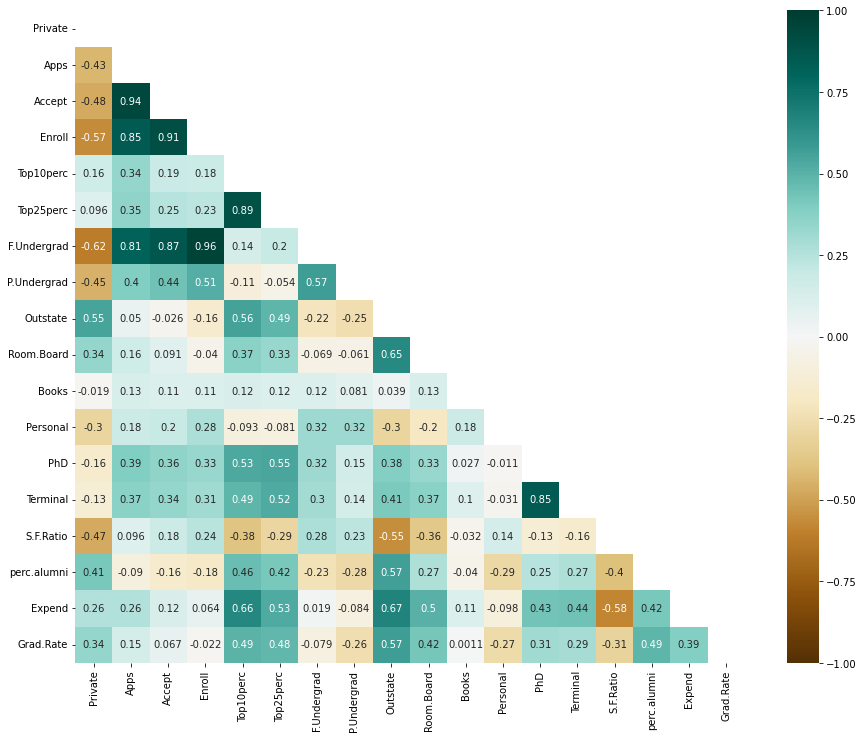

In [18]:
# correlation heatmap
sns.heatmap(College.corr(), vmin = -1, vmax = 1, annot = True, cmap='BrBG', mask=np.triu(College.corr()))

Because of the multiple predictos (high dimensionality), there are various features that exhibit high correlation (i.e. multicolinearity is present).

### 9(a) Splitting data set into a training set and a test set

In [19]:
from sklearn.model_selection import train_test_split
X = College.drop(columns=['Apps'])
y = College['Apps']


In [20]:
# split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2021)

In [21]:
# print traing and test shapes
print(X_train.shape)
print(X_test.shape)

(543, 17)
(234, 17)


<AxesSubplot:title={'center':'Test'}, ylabel='Density'>

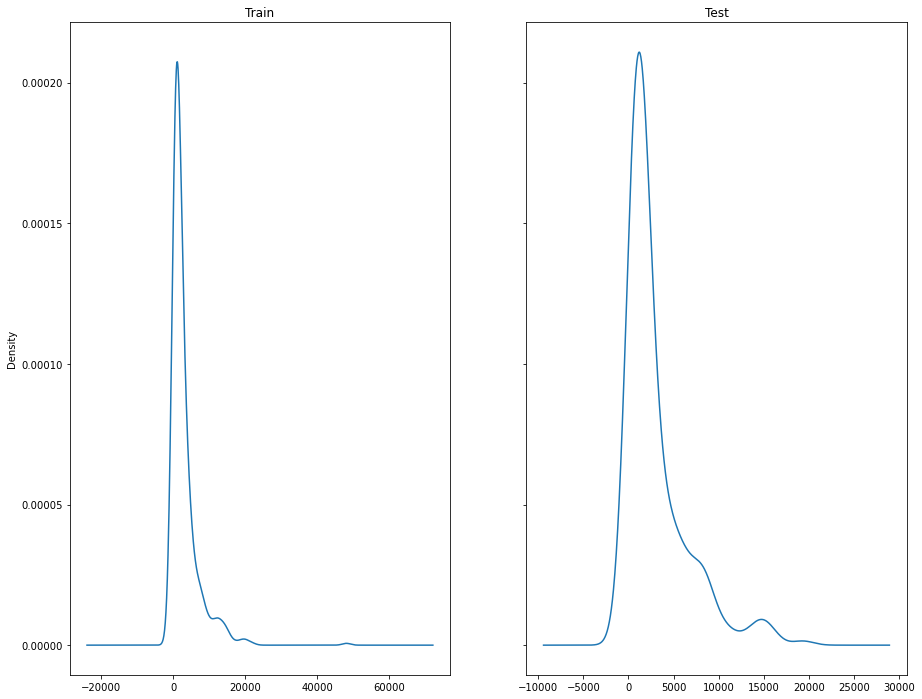

In [22]:
fig, (ax_1, ax_2) = plt.subplots(ncols = 2, sharey = True)
y_train.plot(kind = 'kde', ax = ax_1, title = 'Train')
y_test.plot(kind = 'kde', ax = ax_2, title = 'Test')

### 9(b) Fitting a linear model using least squares

In [23]:
# standardize X_train, X_test
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [24]:
lmfit = LinearRegression(normalize = True).fit(X_train, y_train)
lmpred = lmfit.predict(X_test)
lmcoefs = pd.Series(lmfit.coef_, index = X.columns)
lmintercept = pd.Series(lmfit.intercept_, index = ['Intercept'])
lmtable = pd.DataFrame(pd.concat([lmintercept, lmcoefs]))
lmtable.columns = ['Coefficients']
lmtable

,Coefficients
Intercept,-512.408161
Private,-515.865907
Accept,1.646749
Enroll,-0.877845
Top10perc,48.954060
Top25perc,-15.015434
F.Undergrad,0.012682
P.Undergrad,0.023311
Outstate,-0.094362
Room.Board,0.199448


In [25]:
lmerror = mean_squared_error(y_test, lmpred)
lmerror

995871.4183191918

### 9(c) Ridge regression model

In [26]:
from sklearn.linear_model import Ridge, RidgeCV

In [27]:
n = 100
lambdas = (np.logspace(10, -10, num=100))

In [28]:
ridge = Ridge(normalize = True)
coefs = []

for k in lambdas:
    ridgelm = ridge.set_params(alpha = k).fit(X, y)
    coefs.append(ridgelm.coef_)
    
np.shape(coefs)

(100, 17)

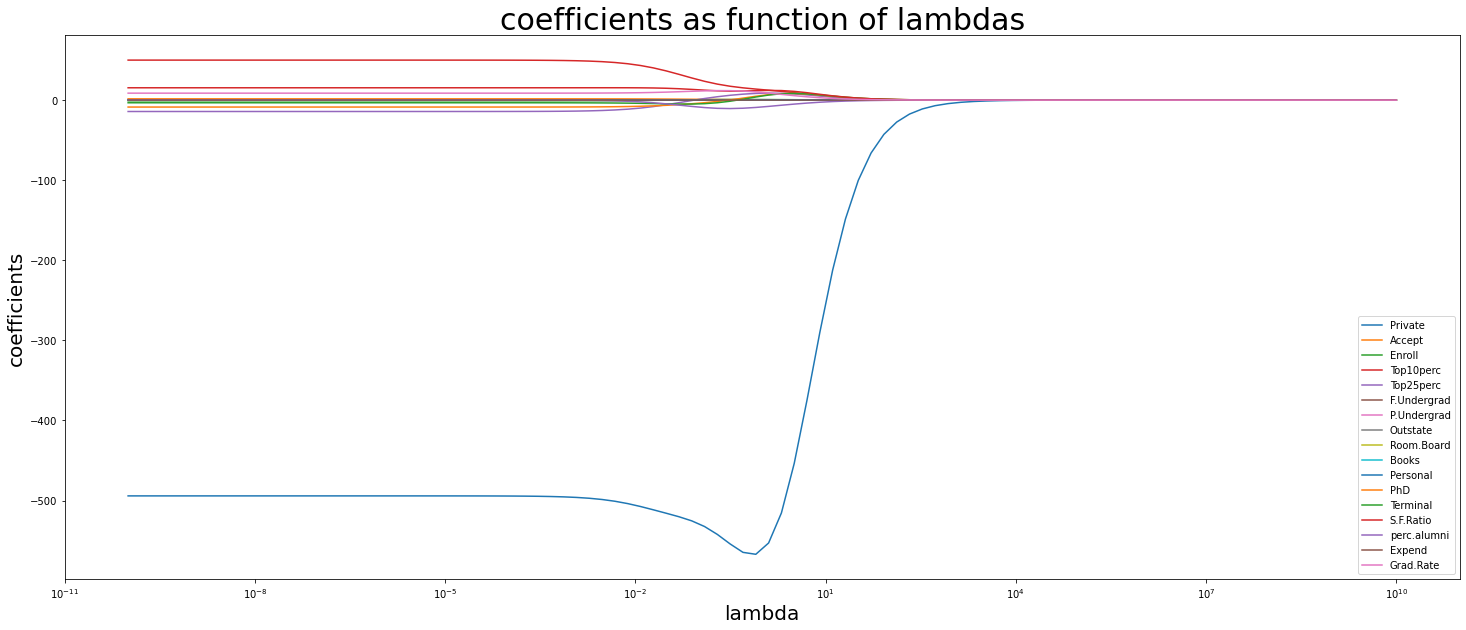

In [29]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda', fontsize = 20)
plt.ylabel('coefficients', fontsize = 20)
plt.title('coefficients as function of lambdas', fontsize = 30)
plt.legend(X)

*This graph suggests that coefficients are likely to be larger near $\lambda$=0 (at $\lambda$=0, it will exactly be like least squares regression. So, I will need a $\lambda$-value slightly higher than that to ensure sufficient reduction in variance.*

In [30]:
# lambda = 0
ridge0 = Ridge(alpha = 0, normalize = True).fit(X_train, y_train)
ridgepred0 = ridge0.predict(X_test)
ridgecoefs0 = pd.Series(ridge0.coef_, index = X.columns)
ridgeintercept0 = pd.Series(ridge0.intercept_, index = ['Intercept'])
ridgetable0 = pd.DataFrame(pd.concat([ridgeintercept0, ridgecoefs0]))
ridgetable0.columns = ['Coefficients']
ridgetable0

,Coefficients
Intercept,-512.408161
Private,-515.865907
Accept,1.646749
Enroll,-0.877845
Top10perc,48.954060
Top25perc,-15.015434
F.Undergrad,0.012682
P.Undergrad,0.023311
Outstate,-0.094362
Room.Board,0.199448


In [31]:
ridgeerror0 = mean_squared_error(y_test, ridgepred0)
ridgeerror0

995871.4183191959

*As explained above, setting $\lambda$=0 returns the same value of coefficients as that of least squares regression.*

**Selecting $\lambda$ through cross-validation**

In [32]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True).fit(X_train, y_train)
ridgecv.alpha_

1e-10

*Therefore, the $\lambda$ with the smallest cross-validation error is at 0.01.*

In [33]:
# lambda = 0.01
ridge1010 = Ridge(alpha = ridgecv.alpha_, normalize = True).fit(X_train, y_train)
ridgepred001 = ridge1010.predict(X_test)
ridgecoefs001 = pd.Series(ridge1010.coef_, index = X.columns)
ridgeintercept001 = pd.Series(ridge1010.intercept_, index = ['Intercept'])
ridgetable001 = pd.DataFrame(pd.concat([ridgeintercept001, ridgecoefs001]))
ridgetable001.columns = ['Coefficients']
ridgetable001

,Coefficients
Intercept,-512.408163
Private,-515.865908
Accept,1.646749
Enroll,-0.877845
Top10perc,48.954060
Top25perc,-15.015434
F.Undergrad,0.012682
P.Undergrad,0.023311
Outstate,-0.094362
Room.Board,0.199448


In [34]:
ridgeerror001 = mean_squared_error(y_test, ridgepred001)
ridgeerror001

995871.4178404263

**Therefore, the MSE through ridge regression for the best value of $\lambda$ is slightly lower than that of least squares regression.**

### 9.d. Lasso regression model

In [35]:
from sklearn.linear_model import Lasso, LassoCV
# import warnings
# warnings.filterwarnings('ignore')

In [36]:
n = 100
lambdas = (np.logspace(10, -10, num=100))

In [37]:
lasso = Lasso(normalize = True)
coefs = []

for k in lambdas:
    lassolm = lasso.set_params(alpha = k).fit(X, y)
    coefs.append(lassolm.coef_)
    
np.shape(coefs)

(100, 17)

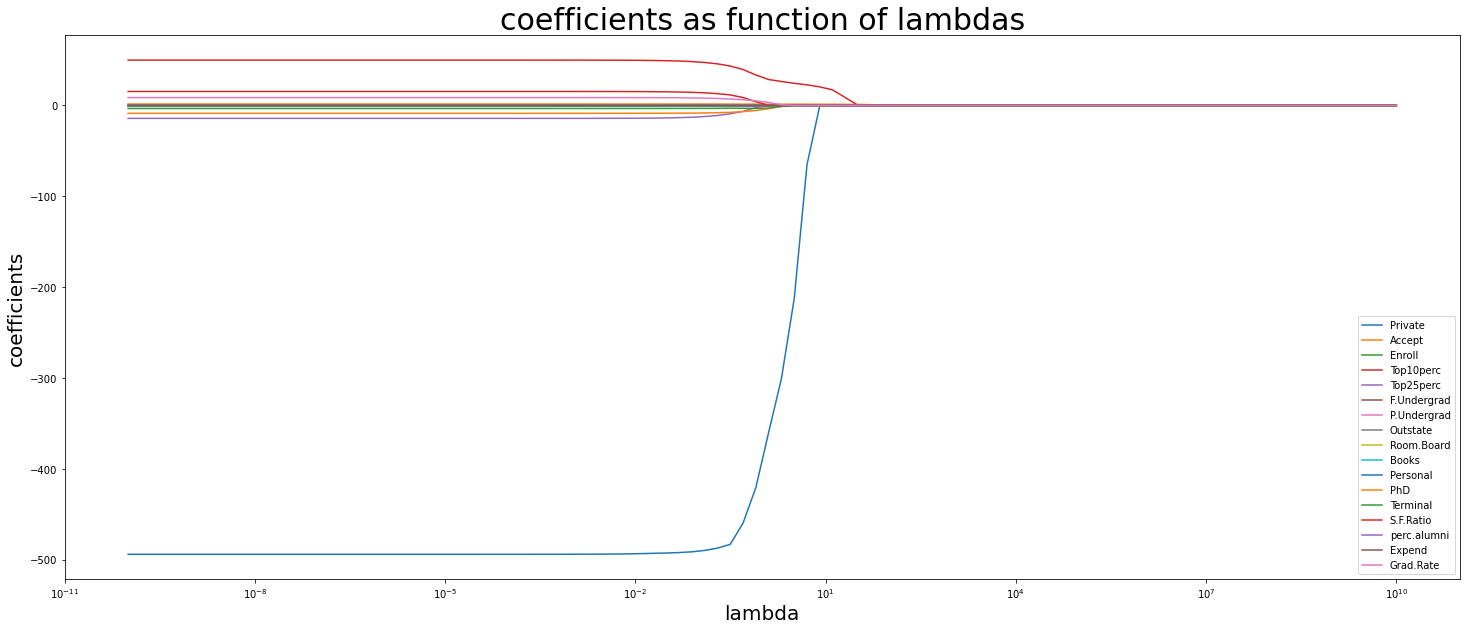

In [38]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda', fontsize = 20)
plt.ylabel('coefficients', fontsize = 20)
plt.title('coefficients as function of lambdas', fontsize = 30)
plt.legend(X)

*This graph suggests that coefficients are likely to be larger near $\lambda$=0 (at $\lambda$=0, it will exactly be like least squares regression. So, I will need a $\lambda$-value slightly higher than that to ensure sufficient reduction in variance. What is interesting however, is that different coefficients reduce to 0 with increasing $\lambda$. This suggests lasso can perform variable selection in addition to variance reduction.*

In [39]:
# lambda = 0
lasso0 = Lasso(alpha = 0, normalize = True).fit(X_train, y_train)
lassopred0 = lasso0.predict(X_test)
lassocoefs0 = pd.Series(lasso0.coef_, index = X.columns)
lassointercept0 = pd.Series(lasso0.intercept_, index = ['Intercept'])
lassotable0 = pd.DataFrame(pd.concat([lassointercept0, lassocoefs0]))
lassotable0.columns = ['Coefficients']
lassotable0

,Coefficients
Intercept,-512.408161
Private,-515.865907
Accept,1.646749
Enroll,-0.877845
Top10perc,48.954060
Top25perc,-15.015434
F.Undergrad,0.012682
P.Undergrad,0.023311
Outstate,-0.094362
Room.Board,0.199448


In [40]:
lassoerror0 = mean_squared_error(y_test, lassopred0)
lassoerror0

995871.4183191945

*As explained above, setting $\lambda$=0 returns the same value of coefficients as that of least squares regression.*

**Selecting $\lambda$ through cross-validation**

In [41]:
lassocv = LassoCV(alphas = lambdas, normalize = True).fit(X_train, y_train)
lassocv.alpha_

1.2618568830660184

*Therefore, the $\lambda$ with the smallest cross-validation error is at 1.2618568830660184.*

In [42]:
# lambda = 1.2618568830660184
lasso005 = Lasso(alpha = lassocv.alpha_, normalize = True).fit(X_train, y_train)
lassopred005 = lasso005.predict(X_test)
lassocoefs005 = pd.Series(lasso005.coef_, index = X.columns)
lassointercept005 = pd.Series(lasso005.intercept_, index = ['Intercept'])
lassotable005 = pd.DataFrame(pd.concat([lassointercept005, lassocoefs005]))
lassotable005.columns = ['Coefficients']
lassotable005

,Coefficients
Intercept,-673.580839
Private,-370.591334
Accept,1.490893
Enroll,-0.318084
Top10perc,28.269919
Top25perc,-0.000000
F.Undergrad,-0.000000
P.Undergrad,0.000000
Outstate,-0.054255
Room.Board,0.153943


In [43]:
lassoerror005 = mean_squared_error(y_test, lassopred005)

In [44]:
# print MSE for each model
print('OLS   = ', lmerror.round(4))
print('Ridge = ', ridgeerror001.round(4))
print('Lasso = ', lassoerror005.round(4))

OLS   =  995871.4183
Ridge =  995871.4178
Lasso =  952164.9813


**Therefore, the MSE through lasso regression for the best value of $\lambda$ is lower than the least squares regression and ridge regression.**

### 9(e) Principal Components Regression (PCR)

In [45]:
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF
from sklearn.decomposition import PCA

In [46]:
pca = PCA()
X_scaled = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.202812,-0.319559,0.149372,0.207191,-0.031502,-0.036004,0.168956,0.045178,0.100507,0.255659,-0.679925,0.243330,0.400442,0.022856,-0.005083,-0.018185,0.020710
1,0.013150,0.419033,-0.027107,0.362324,-0.112086,0.002294,-0.024322,-0.078009,-0.205999,0.111519,-0.139350,0.012237,-0.084645,-0.044591,0.668209,0.340916,0.163274
2,-0.028705,0.442952,-0.028317,0.250415,-0.175489,-0.053479,-0.038284,0.022376,-0.158714,0.107028,-0.099764,-0.011528,0.084219,-0.005395,-0.289985,-0.091788,-0.746638
3,0.344736,0.130412,0.005602,-0.221019,-0.331967,-0.059989,-0.142619,-0.155381,0.335004,0.056230,0.022198,-0.015130,0.044255,-0.100738,-0.298952,0.661023,0.049435
4,0.318675,0.161423,-0.057655,-0.252482,-0.344360,0.020636,-0.083522,-0.136922,0.404634,0.040709,-0.137801,-0.232051,-0.100871,0.137365,0.324859,-0.534082,-0.050407


In [47]:
# selecting M, the number of components that give the lowest cross-validation error
from sklearn.model_selection import cross_val_score

n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

lm = LinearRegression()
MSEdf= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
mse = -1 * cross_val_score(lm, np.ones((n,1)), y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    mse = -1 * cross_val_score(lm, X_scaled[:,:i], y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,1.501065e+07
1,1.470316e+07
2,4.168015e+06
3,4.181085e+06
4,2.853096e+06
5,2.542135e+06
6,2.549381e+06
7,2.516724e+06
8,2.367538e+06
9,2.280221e+06


Text(0, 0.5, 'MSE')

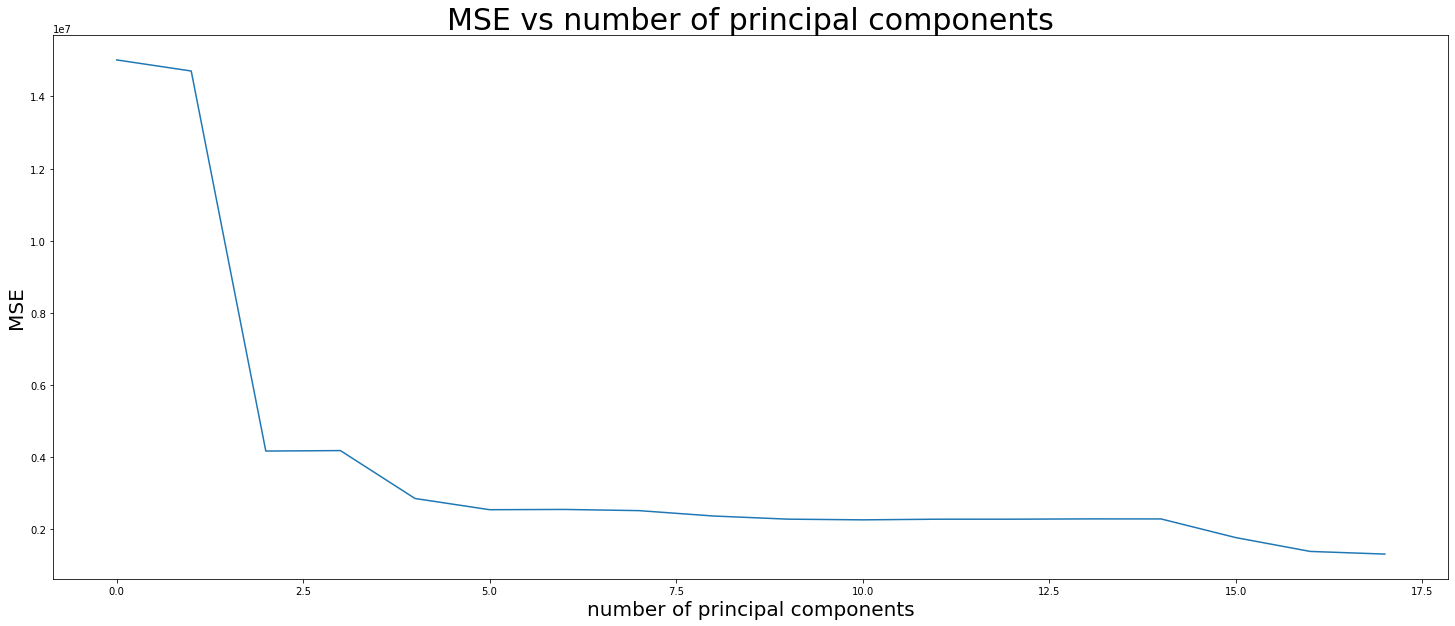

In [48]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdf)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

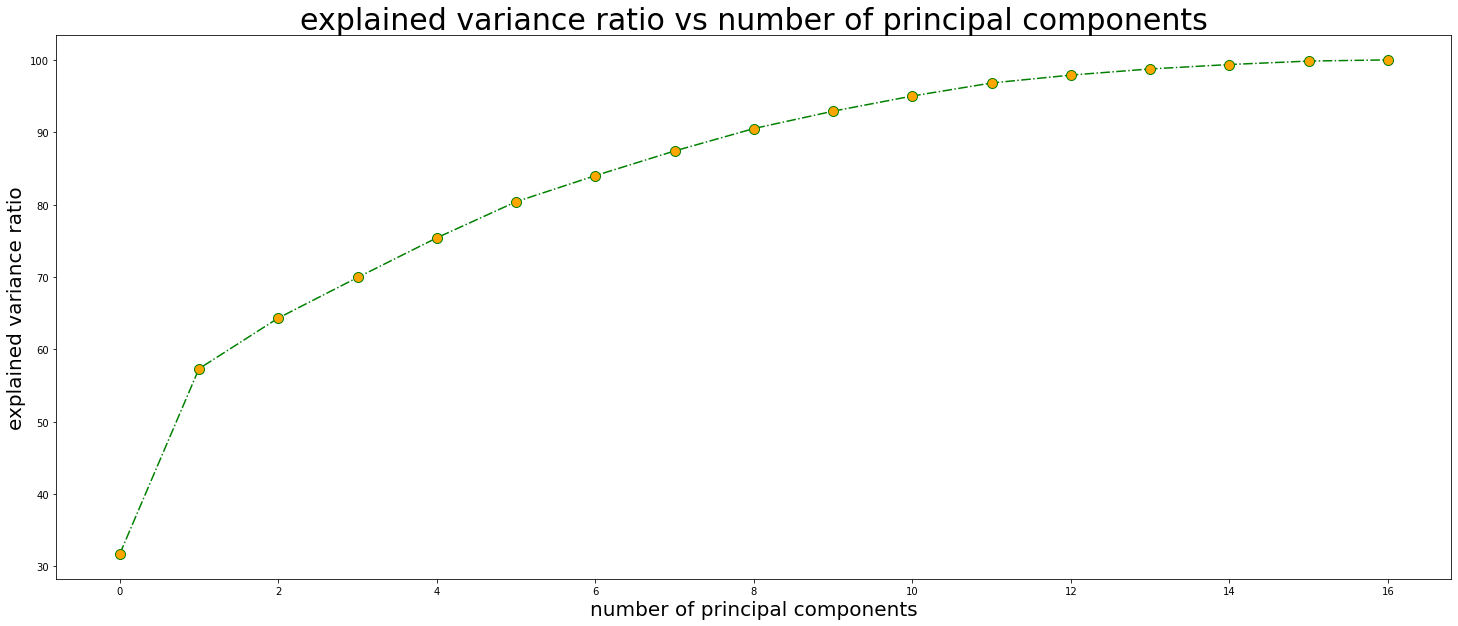

In [49]:
# plotting explained variance ratio
exp_var_ratio = pd.DataFrame(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*This suggests that I will get the lowest MSE at M=17, which is the same as performing a regular least squares regression! So, I will now perform PCR on the training set and validate the model using the test set.*

In [50]:
# performing PCR on train and test data sets
pca_train = PCA()
X_scaled_train = pca_train.fit_transform(scale(X_train))
n = len(X_scaled_train)

lmtrain = LinearRegression()

kf10train = KF(n_splits=10, shuffle=True, random_state=42)
MSEdftrain= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
msetrain = -1 * cross_val_score(lmtrain, np.ones((n,1)), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()    
MSEdftrain = MSEdftrain.append([msetrain])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    msetrain = -1 * cross_val_score(lmtrain, X_scaled_train[:,:i], y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,1.630076e+07
1,1.621623e+07
2,4.994450e+06
3,5.012302e+06
4,4.306119e+06
5,3.141819e+06
6,3.126728e+06
7,3.135045e+06
8,3.141128e+06
9,2.881492e+06


Text(0, 0.5, 'MSE')

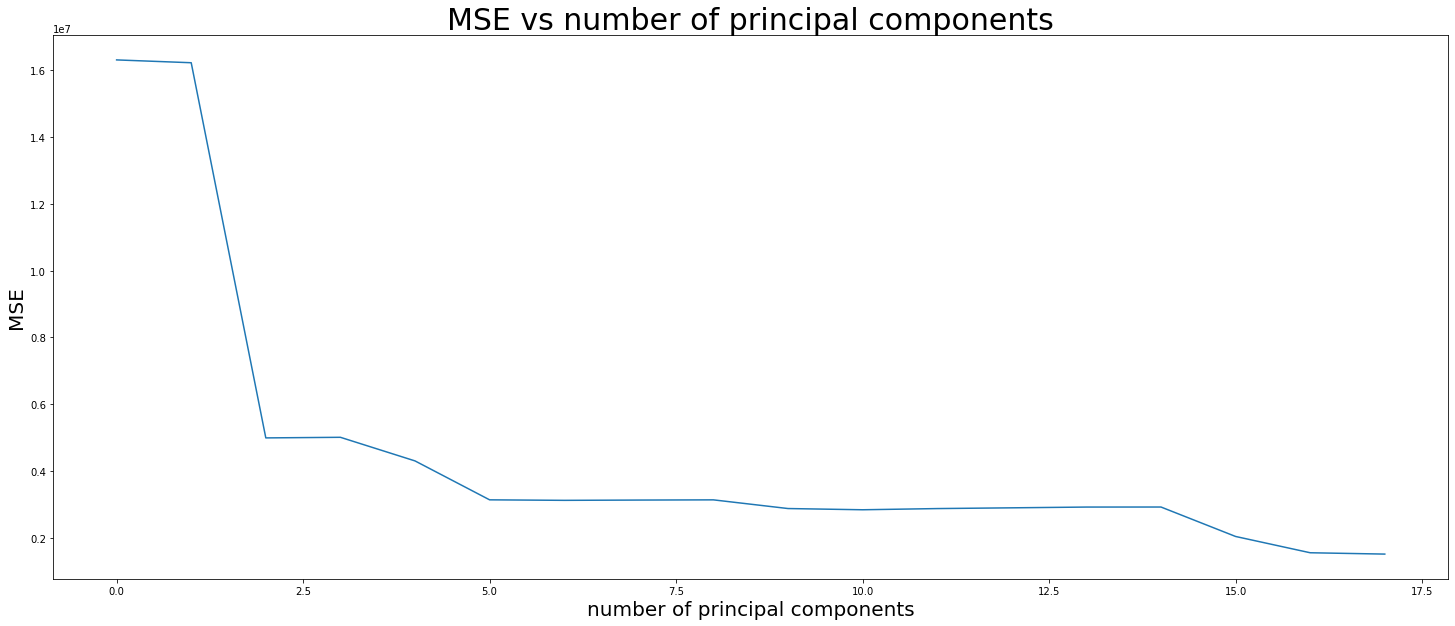

In [51]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

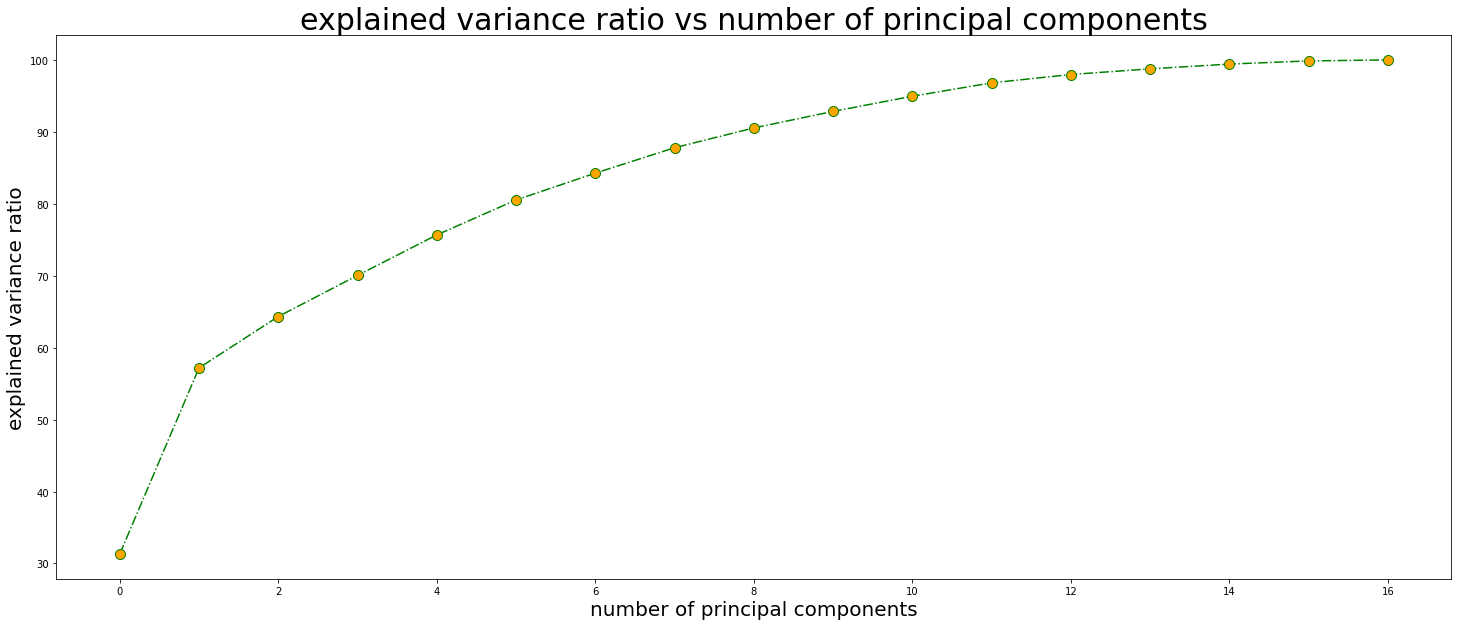

In [52]:
# plotting explained variance ratio
exp_var_ratio_scaled = pd.DataFrame(np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100))

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio_scaled, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*While the MSEs themselves are somewhat reduced due to scaling, the results still suggest that I will get the best test MSE at M=17.*

In [53]:
X_scaled_test = pca.fit_transform(scale(X_test))
pcrfit17 = LinearRegression().fit(X_scaled_train, y_train)
pcrpred17 = pcrfit17.predict(X_scaled_test)

pcrerror17 = mean_squared_error(y_test, pcrpred17)
pcrerror17

6565288.077897278

**So far, PCR has produced the largest MSE amongst all models used.**

### 9(f) Partial Least Squares (PLS)

In [54]:
from sklearn.cross_decomposition import PLSRegression as PLS

In [55]:
# performing PLS on train and test data sets
n = len(X_train)
kf10train = KF(n_splits=10, shuffle=True, random_state=1)

MSEdftrain= pd.DataFrame()

# calculating MSE for the 17 components through cross-validation
for k in np.arange(1, 18):
    plstrain = PLS(n_components=k)
    msetrain = -1 * cross_val_score(plstrain, scale(X_train), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,4.102394e+06
1,2.671552e+06
2,2.516594e+06
3,2.262862e+06
4,1.805301e+06
5,1.632330e+06
6,1.605622e+06
7,1.586531e+06
8,1.585794e+06
9,1.582759e+06


Text(0, 0.5, 'MSE')

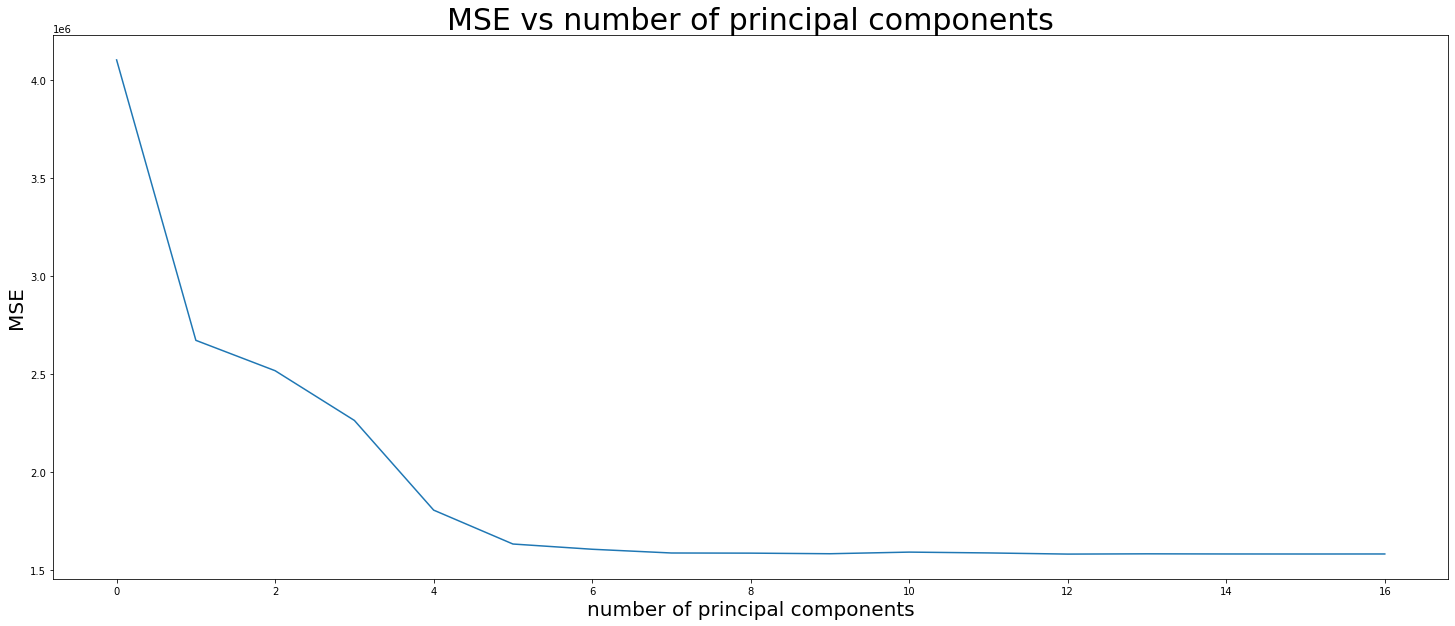

In [56]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

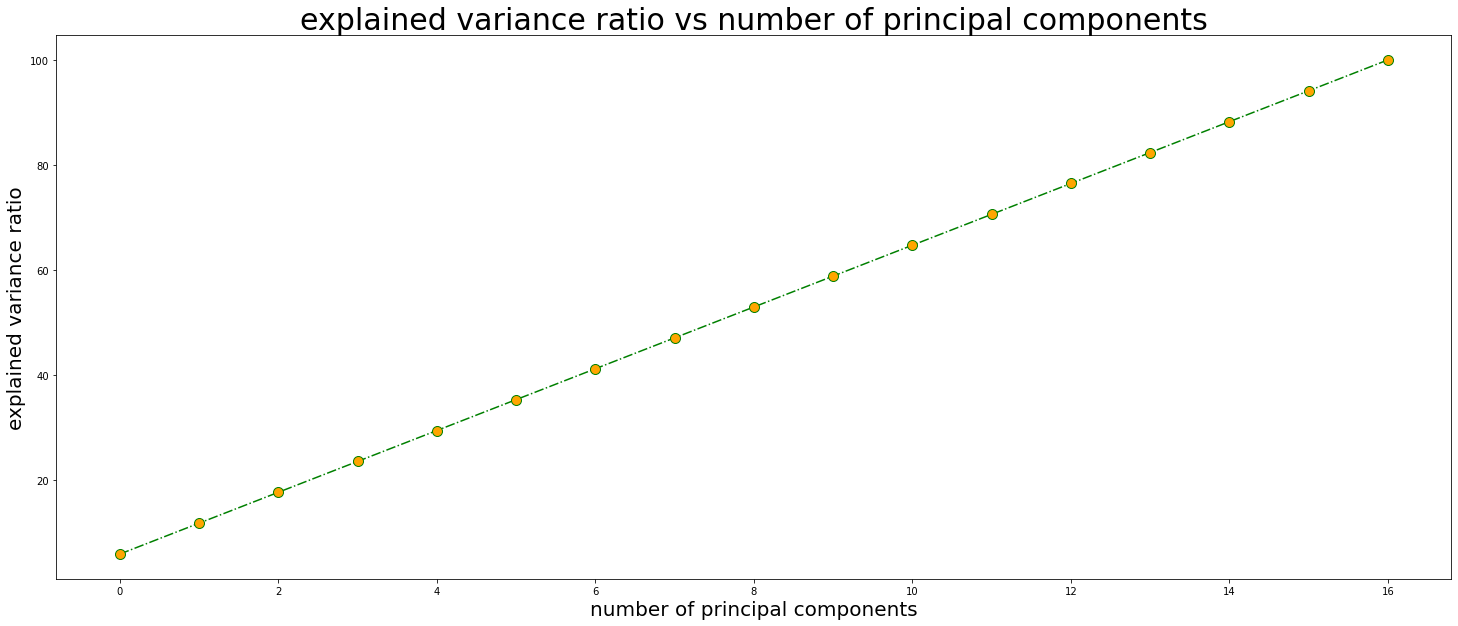

In [57]:
explained_variance_ratio_test = np.var(scale(X_train), axis=0) / np.sum(np.var(scale(X_train), axis=0)) # PLS does not have any method to automatically calculate explained variance ratio
EVR17 = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio_test, decimals=4)*100), columns=['Explained Variance Ratio'])

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(EVR17, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*The results suggest that I will get the best test MSE at M=12.*

In [58]:
plsfit12 = PLS(n_components=12).fit(scale(X_train), y_train)
plspred12 = plsfit12.predict(scale(X_test))
plserror12 = mean_squared_error(y_test, plspred12)
plserror12

1234452.9034578288

**Partial least squares produces significantly lower test MSE than principal components regression.**

### 9(g) Comparing different models

In [59]:
pd.options.display.float_format = '{:,}'.format
error_list = pd.DataFrame([round(lmerror, 2), round(ridgeerror001, 2), round(lassoerror005, 2), round(pcrerror17, 2), round(plserror12, 2)])
error_cols = pd.DataFrame(['linear regression', 'ridge regression', 'lasso regression', 'principal components regression', 'partial least squares'])
error_df = pd.concat([error_cols, error_list], axis=1)
error_df.columns = ['method', 'MSE']
error_df

,method,MSE
0,linear regression,"995,871.42"
1,ridge regression,"995,871.42"
2,lasso regression,"952,164.98"
3,principal components regression,"6,565,288.08"
4,partial least squares,"1,234,452.9"


[Text(0, 0, '952165'),
 Text(0, 0, '995871'),
 Text(0, 0, '995871'),
 Text(0, 0, '1.23445e+06'),
 Text(0, 0, '6.56529e+06')]

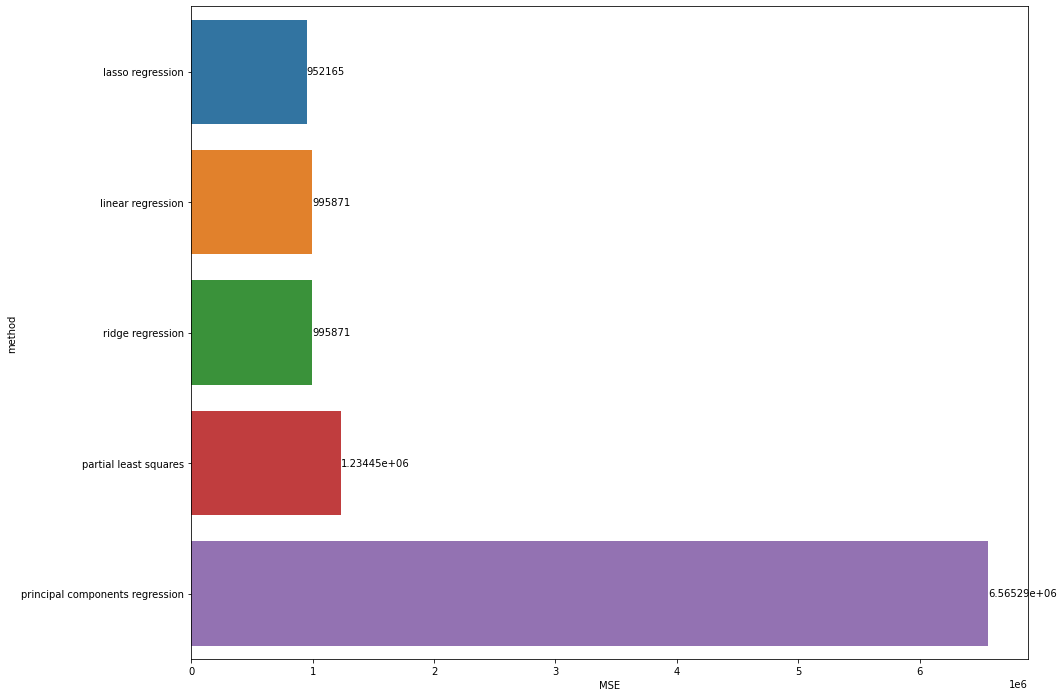

In [60]:
# plot final results by models
ax = sns.barplot(data = error_df, x = 'MSE', y = 'method', order = error_df.sort_values('MSE').method)
ax.bar_label(ax.containers[0])

In [61]:
# plt.xkcd()
# plt.figure(figsize = (25, 10))
# plt.plot(error_df['MSE'], color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange') # ideally I should be using a histogram, but one of the values is excessively higher than the rest which makes it difficult to view other bars
# plt.xlabel('method')
# plt.ylabel('MSE')
# plt.title('MSE vs method')